## Tweet Analysis of Indian Political Parties

#### Imports:

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import wordnet
import tqdm

#### Twitter Account Analysis of BJP4India

In [54]:
# load the data
df1 = pd.read_csv("/Users/omachrekar/My Work/Artificial Intelligence Projects/Twitter Sentiment Analysis of Political Parties/Dataset/BJP4India.csv")

In [55]:
# print the first 5 rows of data
df1.head()

,Datetime,Tweet Id,Text,Username,likeCount
0,2023-06-06 17:00:01+00:00,1666127815585181698,Encapsulating 9 years of women empowerment!\n\...,BJP4India,584
1,2023-06-06 16:28:38+00:00,1666119918344081408,फर्क साफ है....\n\n2014 से पहले महिलाओं को खान...,BJP4India,805
2,2023-06-06 15:57:49+00:00,1666112162815938563,भाजपा राष्ट्रीय अध्यक्ष श्री @JPNadda 7 जून को...,BJP4India,722
3,2023-06-06 13:56:08+00:00,1666081541515034624,"सिर्फ 'महिला विकास' नहीं,\n'महिलाओं के नेतृत्व...",BJP4India,1131
4,2023-06-06 13:10:37+00:00,1666070087634395136,"नारी उत्थान,\nनए भारत की पहचान!\n\nपीएम आवास-ग...",BJP4India,644


In [56]:
# print the last 5 rows of data
df1.tail()

,Datetime,Tweet Id,Text,Username,likeCount
225256,2010-11-19 07:13:05+00:00,5518911541870592,Its time for voters of Bihar to exercise their...,BJP4India,0
225257,2010-11-18 11:05:55+00:00,5215117159440384,In a press conference on all corruptions of UP...,BJP4India,0
225258,2010-11-18 11:04:33+00:00,5214773138427904,In a press conference on all corruptions of UP...,BJP4India,0
225259,2010-11-18 06:43:27+00:00,5149065960488960,Bharatiya Janata Party will be organizing a tw...,BJP4India,0
225260,2010-11-16 05:01:05+00:00,4398527031541760,"BJP President, Shri Nitin Gadkari has strongly...",BJP4India,0


In [57]:
# print the dimensions of the dataframe
df1.shape

(225261, 5)

In [58]:
# mean of the likeCount
df1['likeCount'].mean()

476.333377726282

In [59]:
# first date of the tweet and last date of the tweet
print("Latest tweet date: ", df1['Datetime'].max())
print("Oldest tweet date: ", df1['Datetime'].min())

Latest tweet date:  2023-06-06 17:00:01+00:00
Oldest tweet date:  2010-11-16 05:01:05+00:00


In [60]:
# print columns
df1.columns

Index(['Datetime', 'Tweet Id', 'Text', 'Username', 'likeCount'], dtype='object')

Segregate the tweets based on their language

In [61]:
# install langdetect
# pip install langdetect

In [75]:
from langdetect import detect

# Create separate dataframes for English and Hindi tweets
english_tweets = []
hindi_tweets = []

# Iterate over each tweet
for index, row in df1.iterrows():
    tweet_text = row['Text']
    try:
        lang = detect(tweet_text)
        if lang == 'en':
            english_tweets.append(row)
        elif lang == 'hi':
            hindi_tweets.append(row)
    except:
        # Handle any errors during language detection
        pass

# Convert the English and Hindi tweets lists to dataframes
english_tweets_df = pd.DataFrame(english_tweets)
hindi_tweets_df = pd.DataFrame(hindi_tweets)

Cleaning the text. Removing any symbols and unnecessary characters from the text for making it useful for further processing.

In [76]:
def clean_text(text):
    clean_text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    clean_text = re.sub(r'\s+', ' ', clean_text)
    return clean_text

In [77]:
english_tweets_df['Text'] = english_tweets_df['Text'].apply(clean_text)

In [78]:
english_tweets_df.shape

(170110, 5)

In [79]:
english_tweets_df.head()

,Datetime,Tweet Id,Text,Username,likeCount
0,2023-06-06 17:00:01+00:00,1666127815585181698,Encapsulating 9 years of women empowerment 9Ye...,BJP4India,584
9,2023-06-06 10:56:31+00:00,1666036339660460034,Sukanya Samriddhi Yojana is a pathbreaking ini...,BJP4India,505
13,2023-06-06 09:43:27+00:00,1666017950363705345,In order to increase accessibility of veterina...,BJP4India,905
15,2023-06-06 09:25:48+00:00,1666013508134400000,Modi Govts achievements have been monumental i...,BJP4India,571
17,2023-06-06 08:17:47+00:00,1665996393616642049,Every initiative of the Modi Government reflec...,BJP4India,1180


In [80]:
hindi_tweets_df.shape

(53347, 5)

In [81]:
hindi_tweets_df.head()

,Datetime,Tweet Id,Text,Username,likeCount
1,2023-06-06 16:28:38+00:00,1666119918344081408,फर्क साफ है....\n\n2014 से पहले महिलाओं को खान...,BJP4India,805
2,2023-06-06 15:57:49+00:00,1666112162815938563,भाजपा राष्ट्रीय अध्यक्ष श्री @JPNadda 7 जून को...,BJP4India,722
3,2023-06-06 13:56:08+00:00,1666081541515034624,"सिर्फ 'महिला विकास' नहीं,\n'महिलाओं के नेतृत्व...",BJP4India,1131
4,2023-06-06 13:10:37+00:00,1666070087634395136,"नारी उत्थान,\nनए भारत की पहचान!\n\nपीएम आवास-ग...",BJP4India,644
5,2023-06-06 11:41:04+00:00,1666047552607883264,"भारत की महिलाओं का बढ़ा मान,\n\nप्रतिभा के दम ...",BJP4India,1051


Translate first 5000 Hindi tweets in english and append them to english tweets dataframe

In [82]:
# take only first 5000 tweets from hindi_tweets_df
hindi_tweets_df = hindi_tweets_df[:5000]

In [70]:
# converting hindi tweets to english
!pip3 install googletrans==3.1.0a0

In [71]:
from googletrans import Translator

# Create an empty translator object
translator = Translator()

In [72]:
translation = translator.translate("महिलाओं की प्रगति से सुनिश्चित होती देश की उन्नति\n\nमोदी सरकार द्वारा महिलाओं के सशक्तिकरण हेतु तय बजट में वर्ष 2013-14 के मुकाबले 50 गुना की वृद्धि की गई है। लड़कियों को उच्च शिक्षा के लिए निरंतर प्रोत्साहित किया जा रहा है और यही कारण है कि लड़कियों का वर्ष 2016 में IIT's में नामांकन केवल 8% था जोकि वर्ष 2021-22 में 20% हो गया है।")
print(translation.text)

The progress of the country is ensured by the progress of women

The budget fixed by the Modi government for the empowerment of women has been increased by 50 times as compared to the year 2013-14. Girls are continuously being encouraged for higher education and this is the reason why enrollment of girls in IIT's was only 8% in the year 2016 which has increased to 20% in the year 2021-22.


In [83]:
# Create an instance of the Translator
translator = Translator()

# Translate the text column
hindi_tweets_df['Translated_Text'] = hindi_tweets_df['Text'].apply(lambda x: translator.translate(x).text)

In [84]:
hindi_tweets_df.head()

,Datetime,Tweet Id,Text,Username,likeCount,Translated_Text
1,2023-06-06 16:28:38+00:00,1666119918344081408,फर्क साफ है....\n\n2014 से पहले महिलाओं को खान...,BJP4India,805,"The difference is clear....\n\nBefore 2014, wo..."
2,2023-06-06 15:57:49+00:00,1666112162815938563,भाजपा राष्ट्रीय अध्यक्ष श्री @JPNadda 7 जून को...,BJP4India,722,BJP National President Shri @JPNadda will part...
3,2023-06-06 13:56:08+00:00,1666081541515034624,"सिर्फ 'महिला विकास' नहीं,\n'महिलाओं के नेतृत्व...",BJP4India,1131,"Not just 'women development',\nIndia moving to..."
4,2023-06-06 13:10:37+00:00,1666070087634395136,"नारी उत्थान,\nनए भारत की पहचान!\n\nपीएम आवास-ग...",BJP4India,644,"women upliftment,\nIdentity of new India!\n\nU..."
5,2023-06-06 11:41:04+00:00,1666047552607883264,"भारत की महिलाओं का बढ़ा मान,\n\nप्रतिभा के दम ...",BJP4India,1051,"Increased respect for the women of India,\n\nT..."


In [85]:
# drop the Text column and rename the Translated_Text column to Text
hindi_tweets_df.drop('Text', axis=1, inplace=True)
hindi_tweets_df.rename(columns={'Translated_Text': 'Text'}, inplace=True)


In [86]:
# merge the two dataframes
df = pd.concat([english_tweets_df, hindi_tweets_df])

In [87]:
df.head()

,Datetime,Tweet Id,Text,Username,likeCount
0,2023-06-06 17:00:01+00:00,1666127815585181698,Encapsulating 9 years of women empowerment 9Ye...,BJP4India,584
9,2023-06-06 10:56:31+00:00,1666036339660460034,Sukanya Samriddhi Yojana is a pathbreaking ini...,BJP4India,505
13,2023-06-06 09:43:27+00:00,1666017950363705345,In order to increase accessibility of veterina...,BJP4India,905
15,2023-06-06 09:25:48+00:00,1666013508134400000,Modi Govts achievements have been monumental i...,BJP4India,571
17,2023-06-06 08:17:47+00:00,1665996393616642049,Every initiative of the Modi Government reflec...,BJP4India,1180


In [88]:
df.shape

(175110, 5)

In [89]:
# now we can clean the translated hindi tweets too
df['Text'] = df['Text'].apply(clean_text)

Some viz

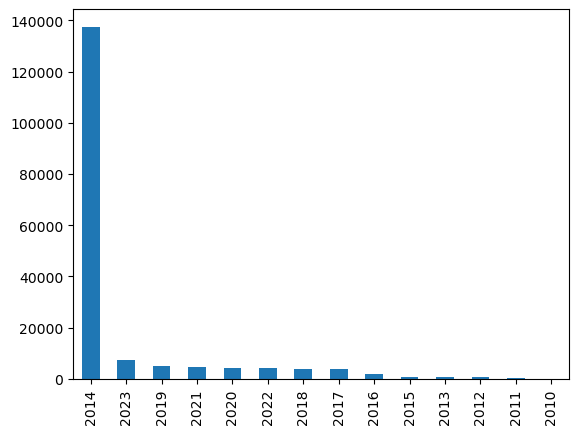

In [91]:
# plot the bar graph of no of tweets yearwise
df['year'] = pd.DatetimeIndex(df['Datetime']).year
df['year'].value_counts().plot(kind='bar')
plt.show()

In 2014, there were general elections in India in which BJP+ gained clear majority. We can see that this year have much higher count of tweets, that could be due to their election campaign. This could be one of the reason behind their victory.

In [93]:
df.head()

,Datetime,Tweet Id,Text,Username,likeCount,year
0,2023-06-06 17:00:01+00:00,1666127815585181698,Encapsulating 9 years of women empowerment 9Ye...,BJP4India,584,2023
9,2023-06-06 10:56:31+00:00,1666036339660460034,Sukanya Samriddhi Yojana is a pathbreaking ini...,BJP4India,505,2023
13,2023-06-06 09:43:27+00:00,1666017950363705345,In order to increase accessibility of veterina...,BJP4India,905,2023
15,2023-06-06 09:25:48+00:00,1666013508134400000,Modi Govts achievements have been monumental i...,BJP4India,571,2023
17,2023-06-06 08:17:47+00:00,1665996393616642049,Every initiative of the Modi Government reflec...,BJP4India,1180,2023


In [96]:
# tweet that got highest number of likeCount
df[df['likeCount'] == df['likeCount'].max()]

,Datetime,Tweet Id,Text,Username,likeCount,year
50338,2019-09-07 03:21:30+00:00,1170175232889409536,This is how a true leader uplifts his team Thr...,BJP4India,37757,2019


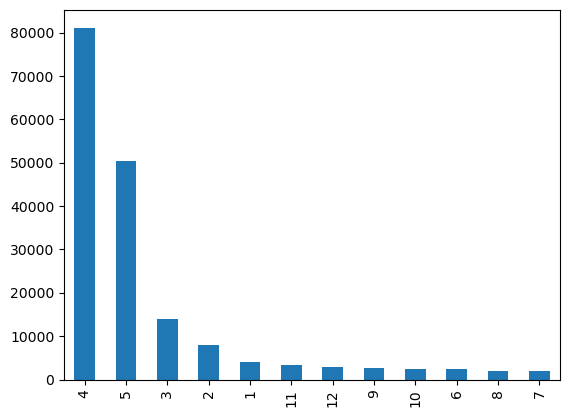

In [97]:
# visualise the the no of tweets per month
df['month'] = pd.DatetimeIndex(df['Datetime']).month
df['month'].value_counts().plot(kind='bar')
plt.show()

Usually April is the month of general assembly elections in India, so that could be the reason of higher tweet count.

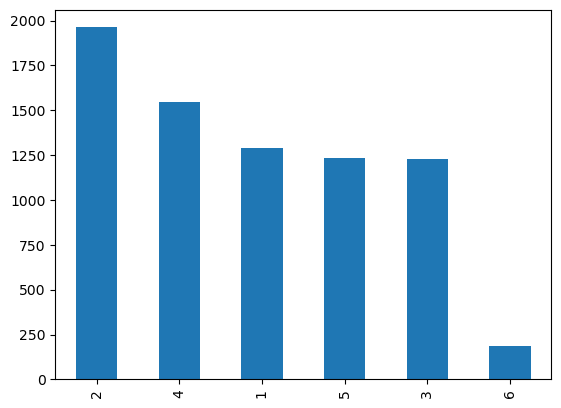

In [99]:
# bar plot of tweets in 2023 by monthwise
df[df['year'] == 2023]['month'].value_counts().plot(kind='bar')
plt.show()

In the current year, most tweets are posted in February followed by April. <br>
PS: This data is only till 6th June.

In [124]:
# saving the dataframe to csv file
df.to_csv('BJP4India_cleaned.csv', index=False)

#### Tweet Sentiment Analysis

Sentiment Analysis: Sentiment analysis is a natural language processing technique used to determine the emotional tone of a piece of text, such as positive, negative, or neutral. It involves analyzing the words, phrases, and context to classify the sentiment expressed. The goal is to understand and quantify the subjective sentiment or opinion conveyed in the text, which can be useful for various applications like social media monitoring, customer feedback analysis, and brand reputation management.

Here two techniques are used for sentiment analysis: <br>
1. VADER (Valence Aware Dictionary and Sentiment Reasoner) - Bag of words approach
2. Roberta Pretrained Model from Huggingface

##### 1. VADER (Valence Aware Dictionary and Sentiment Reasoner)

Advantages of using VADER for sentiment analysis:
1. Simplicity: VADER (Valence Aware Dictionary and sEntiment Reasoner) is a pre-trained lexicon-based approach that does not require extensive training data or complex models. It offers a simple and ready-to-use solution for sentiment analysis tasks. <br>
2. Domain Adaptability: VADER is designed to handle sentiment analysis across different domains. It uses a combination of lexical features, grammar rules, and heuristics to interpret sentiment, allowing it to work reasonably well in various contexts without extensive customization.<br>
3. Fine-grained Sentiment: VADER provides not only the overall sentiment polarity (positive, negative, or neutral) but also a measure of sentiment intensity. It assigns sentiment scores to individual words and incorporates their contextual valence to capture subtle variations in sentiment strength.

Disadvantages of using VADER for sentiment analysis:
1. Reliance on Lexicons: VADER's effectiveness heavily relies on the quality and coverage of its underlying lexicons. If specific domain-specific or colloquial terms are not adequately represented in the lexicon, VADER may struggle to accurately capture the sentiment.<br>
2. Limited Contextual Understanding: VADER primarily relies on lexical and grammatical patterns, which may limit its ability to understand more nuanced or complex language structures. It may struggle with sarcasm, irony, or sentiment expressed through subtle linguistic cues.<br>
3. Lack of Targeted Sentiment Analysis: While VADER performs well at overall sentiment analysis, it may not be the ideal choice for tasks that require targeted sentiment analysis at the aspect or entity level. It does not explicitly handle the identification of sentiment towards specific entities or aspects within a sentence.

In [28]:
df = pd.read_csv('BJP4India_cleaned.csv')

In [29]:
df.head()

,Datetime,Tweet Id,Text,Username,likeCount
0,2023-06-06 17:00:01+00:00,1666127815585181698,Encapsulating 9 years of women empowerment 9Ye...,BJP4India,584
1,2023-06-06 10:56:31+00:00,1666036339660460034,Sukanya Samriddhi Yojana is a pathbreaking ini...,BJP4India,505
2,2023-06-06 09:43:27+00:00,1666017950363705345,In order to increase accessibility of veterina...,BJP4India,905
3,2023-06-06 09:25:48+00:00,1666013508134400000,Modi Govts achievements have been monumental i...,BJP4India,571
4,2023-06-06 08:17:47+00:00,1665996393616642049,Every initiative of the Modi Government reflec...,BJP4India,1180


In [30]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

In [31]:
# Initializing the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

In [32]:
sia.polarity_scores('Natural Language Processing is fun!')

{'neg': 0.0, 'neu': 0.33, 'pos': 0.67, 'compound': 0.7263}

In [33]:
sia.polarity_scores('Quantum entalgement is a very hard concept to understand!')

{'neg': 0.221, 'neu': 0.779, 'pos': 0.0, 'compound': -0.2465}

In [34]:
# run the polarity_scores() method on each tweet and append the results to a new column in the dataframe
df['polarity_score'] = df['Text'].apply(lambda x: sia.polarity_scores(x))

In [35]:
df.head()

,Datetime,Tweet Id,Text,Username,likeCount,polarity_score
0,2023-06-06 17:00:01+00:00,1666127815585181698,Encapsulating 9 years of women empowerment 9Ye...,BJP4India,584,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,2023-06-06 10:56:31+00:00,1666036339660460034,Sukanya Samriddhi Yojana is a pathbreaking ini...,BJP4India,505,"{'neg': 0.0, 'neu': 0.897, 'pos': 0.103, 'comp..."
2,2023-06-06 09:43:27+00:00,1666017950363705345,In order to increase accessibility of veterina...,BJP4India,905,"{'neg': 0.0, 'neu': 0.886, 'pos': 0.114, 'comp..."
3,2023-06-06 09:25:48+00:00,1666013508134400000,Modi Govts achievements have been monumental i...,BJP4India,571,"{'neg': 0.0, 'neu': 0.714, 'pos': 0.286, 'comp..."
4,2023-06-06 08:17:47+00:00,1665996393616642049,Every initiative of the Modi Government reflec...,BJP4India,1180,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [36]:
# separate the polarity score into four separate columns
df = pd.concat([df.drop(['polarity_score'], axis=1), df['polarity_score'].apply(pd.Series)], axis=1)


In [38]:
# add year column
df['year'] = pd.DatetimeIndex(df['Datetime']).year

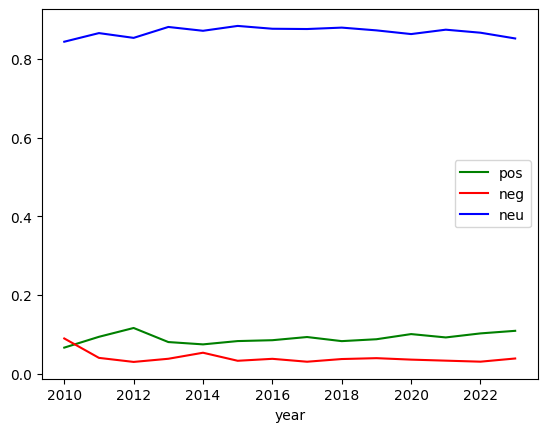

In [39]:
# plot the line graph of positive, negative, neutral scores by yearwise side by side
df.groupby('year')['pos'].mean().plot(kind='line', color='green')
df.groupby('year')['neg'].mean().plot(kind='line', color='red')
df.groupby('year')['neu'].mean().plot(kind='line', color='blue')
plt.legend()
plt.show()

In [40]:
df.head()

,Datetime,Tweet Id,Text,Username,likeCount,neg,neu,pos,compound,year
0,2023-06-06 17:00:01+00:00,1666127815585181698,Encapsulating 9 years of women empowerment 9Ye...,BJP4India,584,0.0,1.000,0.000,0.0000,2023
1,2023-06-06 10:56:31+00:00,1666036339660460034,Sukanya Samriddhi Yojana is a pathbreaking ini...,BJP4India,505,0.0,0.897,0.103,0.3400,2023
2,2023-06-06 09:43:27+00:00,1666017950363705345,In order to increase accessibility of veterina...,BJP4India,905,0.0,0.886,0.114,0.5256,2023
3,2023-06-06 09:25:48+00:00,1666013508134400000,Modi Govts achievements have been monumental i...,BJP4India,571,0.0,0.714,0.286,0.5859,2023
4,2023-06-06 08:17:47+00:00,1665996393616642049,Every initiative of the Modi Government reflec...,BJP4India,1180,0.0,1.000,0.000,0.0000,2023


1. Negative (neg): This score represents the probability or intensity of negative sentiment in the given text. It measures the extent to which the text expresses negativity or a negative emotional tone. A higher neg score indicates a stronger negative sentiment.

2. Neutral (neu): The neu score indicates the probability or intensity of neutral sentiment in the text. It measures the degree of neutrality or lack of strong emotional sentiment. A higher neu score suggests a more neutral or unbiased expression.

3. Positive (pos): The pos score reflects the probability or intensity of positive sentiment in the text. It measures the extent to which the text conveys positivity or a positive emotional tone. A higher pos score indicates a stronger positive sentiment.

4. Compound: The compound score represents an overall normalized sentiment score that combines the positive, negative, and neutral scores. It provides a single aggregated measure of sentiment that ranges from -1 to 1, where -1 indicates highly negative sentiment, 0 represents neutral sentiment, and 1 indicates highly positive sentiment.

In [41]:
# drop neg neu pos columns
df.drop(['neg', 'neu', 'pos'], axis=1, inplace=True)

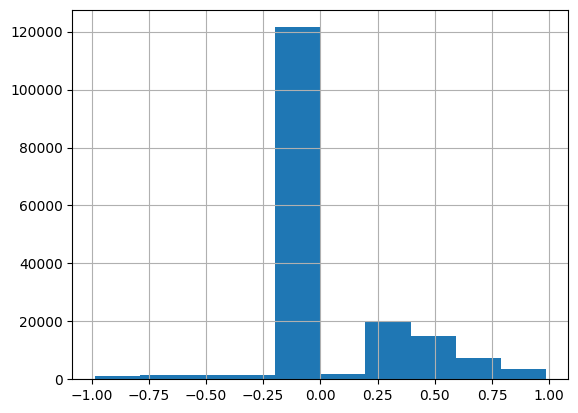

In [42]:
# plot the histogram of compound scores
df['compound'].hist()
plt.show()

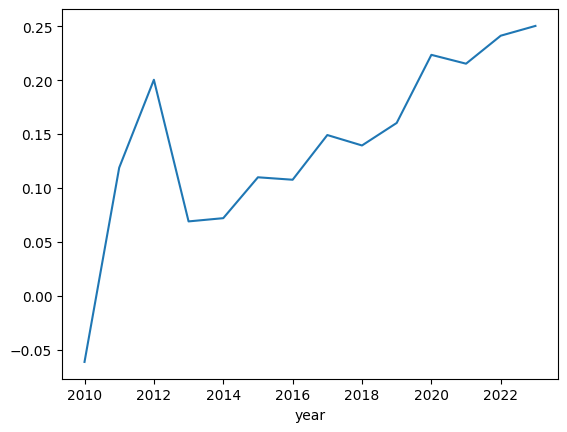

In [43]:
# plot line graph of compound scores yearwise
df.groupby('year')['compound'].mean().plot(kind='line')
plt.show()

In [44]:
# drop the year column
df.drop('year', axis=1, inplace=True)
df.head()

,Datetime,Tweet Id,Text,Username,likeCount,compound
0,2023-06-06 17:00:01+00:00,1666127815585181698,Encapsulating 9 years of women empowerment 9Ye...,BJP4India,584,0.0000
1,2023-06-06 10:56:31+00:00,1666036339660460034,Sukanya Samriddhi Yojana is a pathbreaking ini...,BJP4India,505,0.3400
2,2023-06-06 09:43:27+00:00,1666017950363705345,In order to increase accessibility of veterina...,BJP4India,905,0.5256
3,2023-06-06 09:25:48+00:00,1666013508134400000,Modi Govts achievements have been monumental i...,BJP4India,571,0.5859
4,2023-06-06 08:17:47+00:00,1665996393616642049,Every initiative of the Modi Government reflec...,BJP4India,1180,0.0000


An average compound score of 0.09786676089315291 indicates a slightly positive sentiment in the given text. The compound score ranges from -1 to 1, where values closer to -1 indicate strong negative sentiment, values closer to 1 indicate strong positive sentiment, and values around 0 suggest a more neutral sentiment.
<br>In this case, the positive sentiment is relatively weak, as the compound score is closer to 0 than to 1. It suggests that the text has some positive elements but may also contain elements of neutral or slightly negative sentiment. 

##### 2. RoBERTa Pretrained Model from Huggingface

Advantages of using the RoBERTa model for sentiment analysis:
1. State-of-the-art Performance: RoBERTa is a highly advanced and powerful language model that has achieved state-of-the-art performance on various natural language processing tasks, including sentiment analysis. It has been trained on a large corpus of text data and can capture intricate linguistic patterns and context effectively.

2. Contextual Understanding: RoBERTa exhibits a strong contextual understanding of text, allowing it to consider the meaning and sentiment of words in relation to their surrounding context. This enables more accurate sentiment analysis, especially for sentences with complex structures or ambiguous sentiment expressions.

3. Transfer Learning Capability: RoBERTa benefits from transfer learning, as it has been pre-trained on a massive amount of data. This means it can leverage its knowledge from a diverse range of language patterns and semantics, making it adaptable to sentiment analysis tasks across different domains and languages.

Disadvantages of using the RoBERTa model for sentiment analysis:

1. Computational Resources: RoBERTa is a large and complex model that requires significant computational resources, including powerful hardware and substantial memory. Deploying and utilizing RoBERTa for sentiment analysis can be resource-intensive, limiting its practicality in resource-constrained environments.

2. Training Data Dependence: While RoBERTa performs well in general sentiment analysis, its effectiveness is largely dependent on the quality, relevance, and representativeness of the training data used. If the sentiment analysis task involves a specific domain or uses case, additional fine-tuning or customization may be necessary to achieve optimal performance.

3. Model Interpretability: Deep neural network models like RoBERTa are often considered black boxes, making it challenging to interpret and understand the underlying decision-making process. The lack of transparency can make it difficult to explain and validate the sentiment analysis results, especially in sensitive or regulated domains.

In [ ]:
!pip3 install transformers
!pip3 install scipy
!pip3 install torch
!pip3 install tensorflow

In [ ]:
!pip3 install torch torchvision torchaudio

In [45]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [46]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [47]:
# Run for Roberta 
example = "I hate you"

encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.9654269, 'roberta_neu': 0.02899637, 'roberta_pos': 0.005576666}


In [49]:
# apply the model on each tweet and append the results to a new column in the dataframe and also show the progress bar
def get_sentiment(text):
    encoded_text = tokenizer(text, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict



In [56]:
# remove the roberta score column
df.drop(['roberta_scores' ], axis=1, inplace=True)

In [57]:
df.head()

,Datetime,Tweet Id,Text,Username,likeCount,compound
0,2023-06-06 17:00:01+00:00,1666127815585181698,Encapsulating 9 years of women empowerment 9Ye...,BJP4India,584,0.0000
1,2023-06-06 10:56:31+00:00,1666036339660460034,Sukanya Samriddhi Yojana is a pathbreaking ini...,BJP4India,505,0.3400
2,2023-06-06 09:43:27+00:00,1666017950363705345,In order to increase accessibility of veterina...,BJP4India,905,0.5256
3,2023-06-06 09:25:48+00:00,1666013508134400000,Modi Govts achievements have been monumental i...,BJP4India,571,0.5859
4,2023-06-06 08:17:47+00:00,1665996393616642049,Every initiative of the Modi Government reflec...,BJP4India,1180,0.0000


In [58]:
dfdummy = df.head(100)

In [59]:
# apply the get_sentiment() function on each tweet and append the results to a new column in the dataframe 
dfdummy['roberta_scores'] = dfdummy['Text'].apply(get_sentiment)

/var/folders/zv/x2lv03fs46n15fxz2b08zwx00000gn/T/ipykernel_8348/1877181773.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfdummy['roberta_scores'] = dfdummy['Text'].apply(get_sentiment)


In [60]:
dfdummy.head()

,Datetime,Tweet Id,Text,Username,likeCount,compound,roberta_scores
0,2023-06-06 17:00:01+00:00,1666127815585181698,Encapsulating 9 years of women empowerment 9Ye...,BJP4India,584,0.0000,"{'roberta_neg': 0.01506771, 'roberta_neu': 0.8..."
1,2023-06-06 10:56:31+00:00,1666036339660460034,Sukanya Samriddhi Yojana is a pathbreaking ini...,BJP4India,505,0.3400,"{'roberta_neg': 0.0055726906, 'roberta_neu': 0..."
2,2023-06-06 09:43:27+00:00,1666017950363705345,In order to increase accessibility of veterina...,BJP4India,905,0.5256,"{'roberta_neg': 0.0015218849, 'roberta_neu': 0..."
3,2023-06-06 09:25:48+00:00,1666013508134400000,Modi Govts achievements have been monumental i...,BJP4India,571,0.5859,"{'roberta_neg': 0.0024599396, 'roberta_neu': 0..."
4,2023-06-06 08:17:47+00:00,1665996393616642049,Every initiative of the Modi Government reflec...,BJP4India,1180,0.0000,"{'roberta_neg': 0.0034425727, 'roberta_neu': 0..."


In [61]:
df.shape

(175110, 6)

In [62]:
# apply the get_sentiment() function on each tweet and append the results to a new column in the dataframe
df['roberta_scores'] = df['Text'].apply(get_sentiment)

In [63]:
df.head()

,Datetime,Tweet Id,Text,Username,likeCount,compound,roberta_scores
0,2023-06-06 17:00:01+00:00,1666127815585181698,Encapsulating 9 years of women empowerment 9Ye...,BJP4India,584,0.0000,"{'roberta_neg': 0.01506771, 'roberta_neu': 0.8..."
1,2023-06-06 10:56:31+00:00,1666036339660460034,Sukanya Samriddhi Yojana is a pathbreaking ini...,BJP4India,505,0.3400,"{'roberta_neg': 0.0055726906, 'roberta_neu': 0..."
2,2023-06-06 09:43:27+00:00,1666017950363705345,In order to increase accessibility of veterina...,BJP4India,905,0.5256,"{'roberta_neg': 0.0015218849, 'roberta_neu': 0..."
3,2023-06-06 09:25:48+00:00,1666013508134400000,Modi Govts achievements have been monumental i...,BJP4India,571,0.5859,"{'roberta_neg': 0.0024599396, 'roberta_neu': 0..."
4,2023-06-06 08:17:47+00:00,1665996393616642049,Every initiative of the Modi Government reflec...,BJP4India,1180,0.0000,"{'roberta_neg': 0.0034425727, 'roberta_neu': 0..."


In [64]:
# seprate the roberta_scores column into three separate columns
df = pd.concat([df.drop(['roberta_scores'], axis=1), df['roberta_scores'].apply(pd.Series)], axis=1)

In [65]:
df.head()

,Datetime,Tweet Id,Text,Username,likeCount,compound,roberta_neg,roberta_neu,roberta_pos
0,2023-06-06 17:00:01+00:00,1666127815585181698,Encapsulating 9 years of women empowerment 9Ye...,BJP4India,584,0.0000,0.015068,0.807598,0.177334
1,2023-06-06 10:56:31+00:00,1666036339660460034,Sukanya Samriddhi Yojana is a pathbreaking ini...,BJP4India,505,0.3400,0.005573,0.288496,0.705931
2,2023-06-06 09:43:27+00:00,1666017950363705345,In order to increase accessibility of veterina...,BJP4India,905,0.5256,0.001522,0.127804,0.870674
3,2023-06-06 09:25:48+00:00,1666013508134400000,Modi Govts achievements have been monumental i...,BJP4India,571,0.5859,0.002460,0.077786,0.919754
4,2023-06-06 08:17:47+00:00,1665996393616642049,Every initiative of the Modi Government reflec...,BJP4India,1180,0.0000,0.003443,0.189079,0.807478


In [66]:
# list columns
df.columns

Index(['Datetime', 'Tweet Id', 'Text', 'Username', 'likeCount', 'compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos'],
      dtype='object')

In [67]:
# save the dataframe to csv file
df.to_csv('BJP4India_VADER_ROBERTA_done.csv', index=False)

In [69]:
# create a year column
df['year'] = pd.DatetimeIndex(df['Datetime']).year

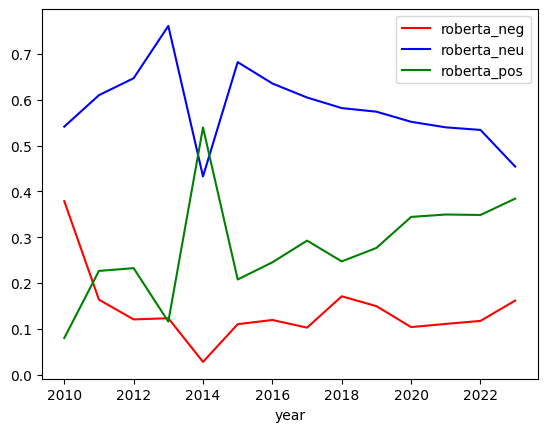

In [70]:
# calculate the mean of roberta_neg, roberta_neu, roberta_pos columns and plot the line graph
df.groupby('year')['roberta_neg'].mean().plot(kind='line', color='red')
df.groupby('year')['roberta_neu'].mean().plot(kind='line', color='blue')
df.groupby('year')['roberta_pos'].mean().plot(kind='line', color='green')   
plt.legend()
plt.show()

We can see a clear dip in sentiment score in 2014 year and we know why.

In [75]:
df.head()

,Datetime,Tweet Id,Text,Username,likeCount,compound,roberta_neg,roberta_neu,roberta_pos
0,2023-06-06 17:00:01+00:00,1666127815585181698,Encapsulating 9 years of women empowerment 9Ye...,BJP4India,584,0.0000,0.015068,0.807598,0.177334
1,2023-06-06 10:56:31+00:00,1666036339660460034,Sukanya Samriddhi Yojana is a pathbreaking ini...,BJP4India,505,0.3400,0.005573,0.288496,0.705931
2,2023-06-06 09:43:27+00:00,1666017950363705345,In order to increase accessibility of veterina...,BJP4India,905,0.5256,0.001522,0.127804,0.870674
3,2023-06-06 09:25:48+00:00,1666013508134400000,Modi Govts achievements have been monumental i...,BJP4India,571,0.5859,0.002460,0.077786,0.919754
4,2023-06-06 08:17:47+00:00,1665996393616642049,Every initiative of the Modi Government reflec...,BJP4India,1180,0.0000,0.003443,0.189079,0.807478


##### End Comparision

In [76]:
# add year column
df['year'] = pd.DatetimeIndex(df['Datetime']).year

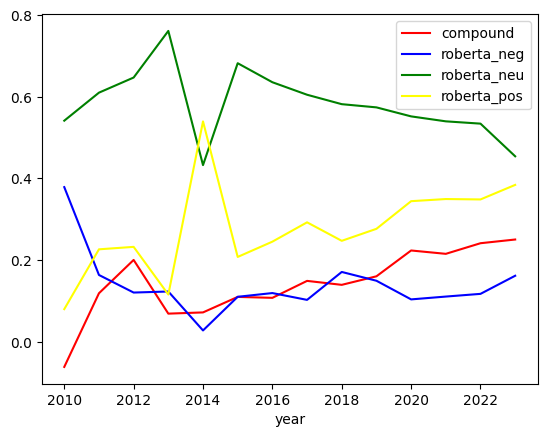

In [77]:
# comparision of VADER and ROBERTA
df.groupby('year')['compound'].mean().plot(kind='line', color='red')
df.groupby('year')['roberta_neg'].mean().plot(kind='line', color='blue')
df.groupby('year')['roberta_neu'].mean().plot(kind='line', color='green')
df.groupby('year')['roberta_pos'].mean().plot(kind='line', color='yellow')
plt.legend()
plt.show()

In [79]:
# mean roberta_neg, roberta_neu, roberta_pos scores
ro_neg_mean = df['roberta_neg'].mean()
ro_neu_mean = df['roberta_neu'].mean()
ro_pos_mean = df['roberta_pos'].mean()

In [80]:
print(ro_neg_mean, ro_neu_mean, ro_pos_mean)

0.05040156 0.45851955 0.49107894
